In [58]:
#BASIC LIBRARIES TO BE NEEDED
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
tf.set_random_seed(101)

### READ DATASET RAIN

In [60]:
dataset = pd.read_csv('dataset_rain.csv')

In [61]:
dataset.columns

Index(['Day', 'Month', 'Year', 'MinPressure', 'MaxPressure', 'MinVapour',
       'MaxVapour', 'MinRelativeHumidity', 'MaxRelativeHumidity',
       'MinTemperature', 'MaxTemperature', 'Rain', 'MinRadiation',
       'MaxRadiation'],
      dtype='object')

In [62]:
dataset.corr()

,Day,Month,Year,MinPressure,MaxPressure,MinVapour,MaxVapour,MinRelativeHumidity,MaxRelativeHumidity,MinTemperature,MaxTemperature,Rain,MinRadiation,MaxRadiation
Day,1.000000,0.011337,0.005534,-0.026737,-0.023597,0.012438,-0.009908,0.020194,0.001810,-0.007138,-0.007970,-0.025246,0.031925,-0.012527
Month,0.011337,1.000000,-0.007650,-0.015876,-0.042033,0.270620,0.195072,0.415881,0.190686,-0.025137,0.156416,0.081969,-0.182563,0.042846
Year,0.005534,-0.007650,1.000000,-0.003431,-0.010428,0.089055,0.083138,0.094404,0.058577,0.052545,0.031824,0.000759,-0.039054,-0.022513
MinPressure,-0.026737,-0.015876,-0.003431,1.000000,0.981270,-0.808819,-0.825122,-0.476431,-0.361314,-0.614129,-0.825390,-0.294619,-0.251876,-0.588964
MaxPressure,-0.023597,-0.042033,-0.010428,0.981270,1.000000,-0.812156,-0.828078,-0.518096,-0.396837,-0.573611,-0.817011,-0.317833,-0.205878,-0.595545
MinVapour,0.012438,0.270620,0.089055,-0.808819,-0.812156,1.000000,0.900799,0.741861,0.492866,0.575405,0.859213,0.280680,0.164914,0.602115
MaxVapour,-0.009908,0.195072,0.083138,-0.825122,-0.828078,0.900799,1.000000,0.575771,0.551166,0.684524,0.920069,0.239333,0.233987,0.592770
MinRelativeHumidity,0.020194,0.415881,0.094404,-0.476431,-0.518096,0.741861,0.575771,1.000000,0.637929,-0.004094,0.438386,0.378737,-0.244592,0.418813
MaxRelativeHumidity,0.001810,0.190686,0.058577,-0.361314,-0.396837,0.492866,0.551166,0.637929,1.000000,-0.030143,0.309932,0.353827,-0.316643,0.321599
MinTemperature,-0.007138,-0.025137,0.052545,-0.614129,-0.573611,0.575405,0.684524,-0.004094,-0.030143,1.000000,0.788499,0.000678,0.552022,0.359069


## Normalizingg

In [63]:
cols_to_norm =['Day','Month', 'Year', 'MinPressure', 'MaxPressure', 'MinVapour',
     'MaxVapour', 'MinRelativeHumidity', 'MaxRelativeHumidity',
   'MinTemperature', 'MaxTemperature','Rain']

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler()

In [66]:
def normal(x):
   return (x-x.min())/(x.max()-x.min())

In [67]:
dataset[cols_to_norm] = dataset[cols_to_norm].apply(lambda x: normal(x))

In [68]:
#dataset[2000:2100]

## Feature columns distinguising

In [69]:
day = tf.feature_column.numeric_column('Day')
month = tf.feature_column.numeric_column('Month')
year = tf.feature_column.numeric_column('Year')
minpressure = tf.feature_column.numeric_column('MinPressure')
maxpressure = tf.feature_column.numeric_column('MaxPressure')
minvapour = tf.feature_column.numeric_column('MinVapour')
maxvapour = tf.feature_column.numeric_column('MaxVapour')
minrh = tf.feature_column.numeric_column('MinRelativeHumidity')
maxrh = tf.feature_column.numeric_column('MaxRelativeHumidity')
mintemp = tf.feature_column.numeric_column('MinTemperature')
maxtemp = tf.feature_column.numeric_column('MaxTemperature')

In [70]:
feat_col = [minpressure,maxpressure,minvapour,maxvapour,minrh,maxrh,maxtemp]

### SPLIT

In [71]:
x_data = dataset.iloc[:, :-3]

In [72]:
y_data = dataset['Rain']

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3,random_state=101)

In [75]:
sess = tf.InteractiveSession()

### MODEL TRAINING & EVALUATING

In [76]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [85]:
model = Sequential()
model.add(Dense(1024, input_dim=11, kernel_initializer='normal', activation='relu'))

model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')


In [86]:
input_func = tf.estimator.inputs.pandas_input_fn(x_train,y_train,batch_size=15,num_epochs=500,shuffle=True)
model.fit(x_train, y_train, batch_size = 20, nb_epoch = 100)

C:\Users\Debraj\AppData\Local\conda\conda\envs\tfdeeplearning\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
1738/1738 [==============================] - 1s 304us/step - loss: 0.0059
Epoch 2/100
1738/1738 [==============================] - 0s 98us/step - loss: 0.0044
Epoch 3/100
1738/1738 [==============================] - 0s 96us/step - loss: 0.0044
Epoch 4/100
1738/1738 [==============================] - 0s 95us/step - loss: 0.0047
Epoch 5/100
1738/1738 [==============================] - 0s 101us/step - loss: 0.0041
Epoch 6/100
1738/1738 [==============================] - 0s 97us/step - loss: 0.0042
Epoch 7/100
1738/1738 [==============================] - 0s 100us/step - loss: 0.0041
Epoch 8/100
1738/1738 [==============================] - 0s 98us/step - loss: 0.0040
Epoch 9/100
1738/1738 [==============================] - 0s 98us/step - loss: 0.0040
Epoch 10/100
1738/1738 [==============================] - 0s 99us/step - loss: 0.0040
Epoch 11/100
1738/1738 [==============================] - 0s 103us/step - loss: 0.0040
Epoch 12/100
1738/1738 [==============================] - 0

Epoch 94/100
1738/1738 [==============================] - 0s 104us/step - loss: 0.0028
Epoch 95/100
1738/1738 [==============================] - 0s 101us/step - loss: 0.0030
Epoch 96/100
1738/1738 [==============================] - 0s 106us/step - loss: 0.0028
Epoch 97/100
1738/1738 [==============================] - 0s 100us/step - loss: 0.0028
Epoch 98/100
1738/1738 [==============================] - 0s 101us/step - loss: 0.0029
Epoch 99/100
1738/1738 [==============================] - 0s 109us/step - loss: 0.0029
Epoch 100/100
1738/1738 [==============================] - 0s 122us/step - loss: 0.0029


In [87]:
y_pred = model.predict(x_test)

In [88]:
y_test = np.asarray(y_test)

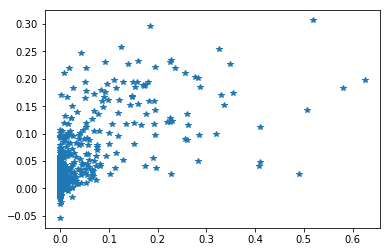

In [89]:
plt.plot(y_test,y_pred,'*')

## PERFORMANCE & RESULT

In [90]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
print("r sqaured = ",r2_score(y_test, y_pred)*100)
print("mse = ",mean_squared_error(y_test,y_pred)*100)
print("meanae = ",mean_absolute_error(y_test,y_pred)*100)
print("meadianae = ",median_absolute_error(y_test,y_pred)*100)

r sqaured =  41.0530344034
mse =  0.350811150373
meanae =  3.02286681922
meadianae =  1.25080524012


In [84]:
y_test.size

746

In [ ]:
X=x_test['MinPressure']

In [ ]:
plt.plot(x_test,p,'*')
plt.xlabel("X_TEST")
plt.ylabel("PREDICTION")
plt.title("PREDICTED GRAPH ON TEST DATA")

In [ ]:
plt.plot(x_test,y_test,'*')
plt.xlabel("X_TEST")
plt.ylabel("Y_TEST")
plt.title("ORIGINAL TEST DATASET")

In [ ]:
plt.plot(y_test,y_pred,'^')
plt.xlabel("Y_TEST")
plt.ylabel("PREDICTIONS")
plt.title("ORIGINAL OUTPUTS VS PREDICTED OUTPUTS")